### REPORTE 7

Nombre: Jahaira Rodríguez

Código: 20201405

### Ensayo

La pregunta de investigación que plantea el autor en el articulo presentado “The effects of esposare to better neighborhoods on children: New evidence from moving to opportunity experiment.”, es si existe algún efecto positivo en el hecho de que jóvenes o niños puedan mudarse a “mejores barrios” y si es que esto afecta en su futuro económico. 

Las fortalezas de este articulo es la comparación que se realiza a los distintos tipos de grupos de familias, entre estos: los que pudieron mudarse a un lugar menor de pobreza, los otros con vivienda y los de control. Se analizaron las ganancias económicas que se tuvo cuando estos eran jóvenes, lo que sirve para obtener una mejor evidencia de cuál ha sido su crecimiento, como han progresado y si efectivamente hay una mejora económica. Sin embargo, se pudieron notar algunas debilidad, ya que este articulo pudo haber especificado las posibles consecuencias que se podrían generar económicamente que implica que estos niños continúen viviendo en casas con la mayor tasa de pobreza. 

Por otro lado, este articulo contribuye en el impacto del cambio de vecindarios de niños que eran jóvenes cuando sus respectivas familias se mudaron, al precisar estos efectos a largo plazo. Ademas, se señala que mientras más temprana sea la exposición de los jóvenes a la mudanza en un mejor área, los beneficios aumentarían, es por esto que el articulo brinda una hipótesis que los beneficios de trasladarse a una zona de menor pobreza disminuyen con la edad del niño en el momento del traslado. Se puede resaltar este texto que trata estas cuestiones ya que los niños mas jóvenes que fueron parte de este experimento, reciéntenlo pudieron ser consideraos en u análisis a largo plazo por la edad para poder ingresar en el mercado laboral de los adultos. 

Finalmente, se puede identificar el impacto de manera diferente para estos subgrupos dentro de la muestra para tener mayor certeza del impacto de dar oportunidades de mudanza y específicamente para el trabajo en políticas que facilite a grupos identificados que enfrentan mayores dificultades para la movilidad económica.

## Código

In [3]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [6]:
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)
data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [7]:
pd.get_dummies(data_2,columns=["class_format"]).head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1


Text(19.309791666666662, 0.5, 'Estudiantes')

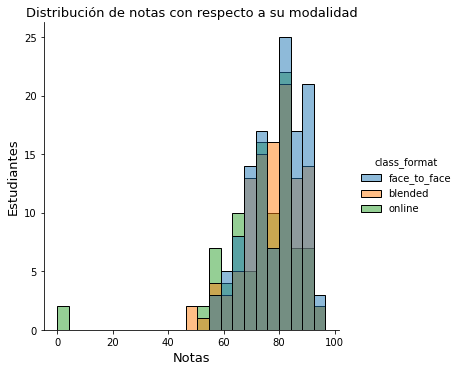

In [10]:
sns.displot(data_2, x="falsexam", hue= "class_format")
plt.title("Distribución de notas con respecto a su modalidad", fontsize=13)
plt.xlabel("Notas", fontsize=13)
plt.ylabel("Estudiantes", fontsize=13)

Interpretacion: 
Se puede observar que las clases "online" hacen que los estudiantes rindan menos del promedio, mientras que las clases "face to face" son las que muestran un mayor rendimiento academico entre sus estudiantes. Estas clases tambien poseen la mayor cantidad de estudiantes probados (x>60) y quienes alcanzaron el puntaje del 100, lo cual demuestra la efectividad de la educacion "face to face". Ademas, si bien las clases "blended" tampoco se quedan atras en cuanto rendimiento academico, ya que se presentan notas menores a 60, lo cual, si bien nos hace dudar de su efectividad, son mejores comparadas a las de las clases "online". 

### Difference-in-means estimator.

In [12]:
VAM=data_2[['class_format','falsexam']]
VAM.head(13)

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
2,blended,83.37000
3,blended,90.01994
4,online,83.30000
5,online,88.34996
6,blended,78.40000
7,face_to_face,90.00000
8,face_to_face,88.31000
9,online,73.37000


In [13]:
Dividir= ["face_to_face","online"]
VAMP= VAM[VAM['class_format'].isin(Dividir)]
VAMP

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
4,online,83.30000
5,online,88.34996
7,face_to_face,90.00000
...,...,...
316,face_to_face,91.65000
317,face_to_face,84.99000
319,online,70.05000
320,online,66.69000


#### Promedio de notas

In [14]:
VAMP.groupby(["class_format"]).mean ()

,falsexam
class_format,
face_to_face,78.547485
online,73.635263


In [15]:
Diferencia_medias=  78.547485-73.635263
Diferencia_medias

4.912222

Interpretación: 
En el histograma comparado presentado se confirma lo observado, que el formato presencial sería más beneficioso para el rendimiento académico de los estudiantes.Se observa que los estudiantes con una nota mayor fueron los de clase "face to face" (presencial) en comparación con los que llevaron las clases "online". Se ve reflejado en que la media de las evaluaciones para las clases "online" disminuyó en 4.9122 respecto a las clases "fce to face" (presenciales).

### Difference-in-means estimator via linear regression

In [16]:
ols_reg=sm.OLS.from_formula("falsexam~class_format", data= VAMP).fit()
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 15 Nov 2022   Prob (F-statistic):            0.00382
Time:                        11:10:38   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 78.5475      1.113     70.563      0.000      76.353      80.742
class_format[T.online]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos notar que el R cuadrado es muy reducido lo que puede indicar una suposicion con más variables en juego para determinar el valor de Falsexam. Ademas, se observa que el valor encontrado para "beta 1" es el mismo que la diferencia que se halló en el "Difference-in-means estimator": 4.9122. Por otro lado, la interpretacion de las otras variables se podra encontrar a partir del summary ya que el p-valor es menor a 0.05. 